In [1]:
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

## Load data

In [2]:
filename = 'train.csv' 
df = pd.read_csv(filename)
df.head()

/Users/dahliaradif/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


## Downsample, keep only entries where players is rusher

In [3]:
print("Before")
print(df.head()[['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine', 'Yards']])
print(df.shape)

# Only keep entries associated with rusher
df = df[df['NflIdRusher']==df['NflId']]
df.reset_index(drop=True, inplace=True)

print("After")
print(df.head()[['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine', 'Yards']])
print(df.shape)

Before
       GameId          PlayId FieldPosition PossessionTeam  YardLine  Yards
0  2017090700  20170907000118            NE             NE        35      8
1  2017090700  20170907000118            NE             NE        35      8
2  2017090700  20170907000118            NE             NE        35      8
3  2017090700  20170907000118            NE             NE        35      8
4  2017090700  20170907000118            NE             NE        35      8
(509762, 49)
After
       GameId          PlayId FieldPosition PossessionTeam  YardLine  Yards
0  2017090700  20170907000118            NE             NE        35      8
1  2017090700  20170907000139            NE             NE        43      3
2  2017090700  20170907000189            KC             NE        35      5
3  2017090700  20170907000345            KC             NE         2      2
4  2017090700  20170907000395            KC             KC        25      7
(23171, 49)


## Fix null field positions

In [4]:
print("Before")
field_positions = df['FieldPosition']
print(sum(field_positions.isnull()==True))
print(df.shape)
print(df[df.FieldPosition.isnull()][['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine']].head())

# Handle 50 YardLine by filling in the null 'FieldPositions' with the value in 'PossessionTeam'
df.FieldPosition.fillna(df.PossessionTeam, inplace=True)

print("After")
field_positions = df['FieldPosition']
print(sum(field_positions.isnull()==True))
print(df.shape)
print(df[198:203][['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine']])

Before
292
(23171, 49)
         GameId          PlayId FieldPosition PossessionTeam  YardLine
9    2017090700  20170907000801           NaN             KC        50
124  2017091001  20170910012016           NaN            CHI        50
191  2017091002  20170910023694           NaN            CIN        50
222  2017091003  20170910032712           NaN            CLV        50
224  2017091003  20170910032982           NaN            PIT        50
After
0
(23171, 49)
         GameId          PlayId FieldPosition PossessionTeam  YardLine
198  2017091003  20170910030129           CLV            CLV        12
199  2017091003  20170910030204           CLV            CLV        25
200  2017091003  20170910030225           CLV            CLV        30
201  2017091003  20170910030257           CLV            CLV        23
202  2017091003  20170910030555           CLV            CLV        32


## Make defenders in box take values [0, 11]

Before
1 in Box Count: 1
2 in Box Count: 1
NaN in Box Count: 3
After
1 in Box Count: 0
2 in Box Count: 0
NaN in Box Count: 0


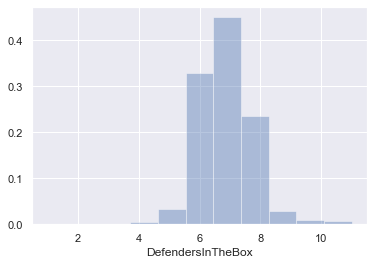

In [5]:
print("Before")
print("1 in Box Count:", len(df[df.DefendersInTheBox==1]))
print("2 in Box Count:", len(df[df.DefendersInTheBox==2]))
print("NaN in Box Count:", sum(df.DefendersInTheBox.isnull()))
sns.distplot(df.DefendersInTheBox[df.DefendersInTheBox.isnull()==False], bins=11, kde=False, norm_hist=True)

# Fill nan with median (i.e. 7), and bump 1 or 2 (few samples) up to 3
df.DefendersInTheBox.fillna(7, inplace=True)
df.DefendersInTheBox.replace(to_replace=[1, 2], value=3, inplace=True)

print("After")
print("1 in Box Count:", len(df[df.DefendersInTheBox==1]))
print("2 in Box Count:", len(df[df.DefendersInTheBox==2]))
print("NaN in Box Count:", sum(df.DefendersInTheBox.isnull()))

## Group rare position values

Before 

Position
CB        9
DE        1
DT        2
FB      169
HB      616
QB       77
RB    21628
TE       31
WR      638
dtype: int64

 After
Position
FB         169
HB         616
Other       12
QB          77
RB       21628
TE          31
WR         638
dtype: int64


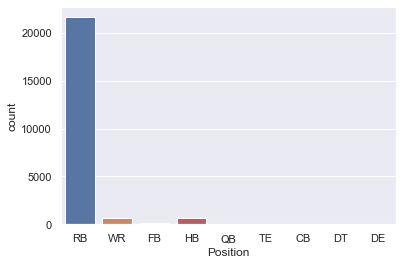

In [6]:
print("Before \n")
print(df.groupby(['Position']).size())
sns.countplot(x="Position", data=df)

# Change 'CB', 'DE', 'DT' (few samples) to 'Other'
df.Position.replace(to_replace=['CB', 'DE', 'DT'], value='Other', inplace=True)

print("\n After")
print(df.groupby(['Position']).size())

## Fix inconsistent team names

In [7]:
def fixTeamName(team):
    if team == 'BAL':
        return 'BLT'
    elif team == 'ARI':
        return 'ARZ'
    elif team == 'CLE':
        return 'CLV'
    elif team == 'HOU':
        return 'HST'
    return team
    
df['HomeTeamAbbr'] = df.apply(lambda x: fixTeamName(x['HomeTeamAbbr']), axis=1)
df['VisitorTeamAbbr'] = df.apply(lambda x: fixTeamName(x['VisitorTeamAbbr']), axis=1)
df['PossessionTeam'] = df.apply(lambda x: fixTeamName(x['PossessionTeam']), axis=1)

## Find which team is on defense (new feature)

In [8]:
def findDefense(home_team, away_team, possession_team):
    if home_team == possession_team:
        return away_team
    elif away_team == possession_team:
        return home_team
    else:
        print('neither home nor away team matches possession team')

df['DefenseTeam'] = df.apply(lambda x: findDefense(x['HomeTeamAbbr'],x['VisitorTeamAbbr'],x['PossessionTeam']), axis=1)

## Calculate average yards by offensive team (new feature)

In [9]:
yards_avg_offense = df[['PossessionTeam','Yards']].groupby(['PossessionTeam']).mean()
yards_avg_offense = yards_avg_offense.rename(columns={"Yards": "YardsAvgOffense"}).reset_index()

print(yards_avg_offense.tail())
df = pd.merge(df, yards_avg_offense, on = 'PossessionTeam')

   PossessionTeam  YardsAvgOffense
27            SEA         4.124839
28             SF         4.482337
29             TB         3.594427
30            TEN         3.992021
31            WAS         3.862974


## Calculate average yards by defensive team (new feature)

In [10]:
yards_avg_defense = df[['DefenseTeam','Yards']].groupby(['DefenseTeam']).mean()
yards_avg_defense = yards_avg_defense.rename(columns={"Yards": "YardsAvgDefense"}).reset_index()

print(yards_avg_defense.tail())
df = pd.merge(df, yards_avg_defense, on = 'DefenseTeam')

   DefenseTeam  YardsAvgDefense
27         SEA         4.395218
28          SF         4.062814
29          TB         4.518724
30         TEN         3.910864
31         WAS         4.533686


## Calculate yards remaining (new feature)

In [11]:
df['YardsRemaining'] = 100 - df.YardLine[df.FieldPosition == df.PossessionTeam]
df.YardsRemaining.fillna(df.YardLine, inplace=True)
df.head()[['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine', 'Yards', 'YardsRemaining']]

,GameId,PlayId,FieldPosition,PossessionTeam,YardLine,Yards,YardsRemaining
0,2017090700,20170907000118,NE,NE,35,8,65.0
1,2017090700,20170907000139,NE,NE,43,3,57.0
2,2017090700,20170907000189,KC,NE,35,5,35.0
3,2017090700,20170907000345,KC,NE,2,2,2.0
4,2017090700,20170907000473,KC,NE,29,10,29.0


## Calculate number of carries (new feature)

In [12]:
carries = df[['PlayId', 'NflIdRusher', 'DisplayName']].groupby(['DisplayName', 'NflIdRusher']).agg('count').reset_index()
carries.rename(columns={'PlayId':'Carries'}, inplace=True)
print(carries.sort_values(by='Carries'))
print(sum(carries['Carries']>=10))

         DisplayName  NflIdRusher  Carries
372        Zay Jones      2557863        1
94   Darren McFadden          284        1
216      Keith Smith      2550400        1
92   Darius Jennings      2553896        1
90      Dante Pettis      2560836        1
..               ...          ...      ...
213      Kareem Hunt      2557917      450
260    Melvin Gordon      2552469      455
192    Jordan Howard      2555418      518
346      Todd Gurley      2552475      533
140  Ezekiel Elliott      2555224      537

[373 rows x 3 columns]
158


In [13]:
df = df.merge(carries[['NflIdRusher', 'Carries']], how = 'left', on = 'NflIdRusher')
df.head()[['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine', 'Yards', 'YardsRemaining', 'NflIdRusher', 'DisplayName', 'Carries']]

,GameId,PlayId,FieldPosition,PossessionTeam,YardLine,Yards,YardsRemaining,NflIdRusher,DisplayName,Carries
0,2017090700,20170907000118,NE,NE,35,8,65.0,2543773,James White,135
1,2017090700,20170907000139,NE,NE,43,3,57.0,2543773,James White,135
2,2017090700,20170907000189,KC,NE,35,5,35.0,2543773,James White,135
3,2017090700,20170907000345,KC,NE,2,2,2.0,2539663,Mike Gillislee,120
4,2017090700,20170907000473,KC,NE,29,10,29.0,2543773,James White,135


## Calculate rusher mean, max, min yards (new features)

In [14]:
player_yards = df[['Yards', 'NflIdRusher', 'DisplayName']].groupby(['DisplayName', 'NflIdRusher']).agg(['mean', 'max', 'min'])['Yards'].reset_index()
player_yards.rename(columns={'mean':'RusherMeanYards', 'max':'RusherMaxYards', 'min':'RusherMinYards'}, inplace=True)
player_yards.head()

,DisplayName,NflIdRusher,RusherMeanYards,RusherMaxYards,RusherMinYards
0,Aaron Jones,2558116,5.533019,67,-5
1,Aaron Ripkowski,2552477,2.600000,4,1
2,Adam Humphries,2553895,6.500000,7,6
3,Adam Thielen,2541785,6.833333,15,-1
4,Adoree' Jackson,2558065,11.000000,20,-3


In [15]:
df = df.merge(player_yards[['NflIdRusher', 'RusherMeanYards', 'RusherMaxYards', 'RusherMinYards']], how = 'left', on = 'NflIdRusher')
df.head()[['GameId', 'PlayId', 'FieldPosition', 'PossessionTeam', 'YardLine', 'Yards', 'YardsRemaining', 'NflIdRusher', 'DisplayName', 'Carries', 'RusherMeanYards', 'RusherMaxYards', 'RusherMinYards']]

,GameId,PlayId,FieldPosition,PossessionTeam,YardLine,Yards,YardsRemaining,NflIdRusher,DisplayName,Carries,RusherMeanYards,RusherMaxYards,RusherMinYards
0,2017090700,20170907000118,NE,NE,35,8,65.0,2543773,James White,135,4.385185,27,-6
1,2017090700,20170907000139,NE,NE,43,3,57.0,2543773,James White,135,4.385185,27,-6
2,2017090700,20170907000189,KC,NE,35,5,35.0,2543773,James White,135,4.385185,27,-6
3,2017090700,20170907000345,KC,NE,2,2,2.0,2539663,Mike Gillislee,120,3.550000,16,-4
4,2017090700,20170907000473,KC,NE,29,10,29.0,2543773,James White,135,4.385185,27,-6


## Split data

In [16]:
train, dev = train_test_split(df, test_size=0.3, random_state=1, shuffle=True)
print(train.shape)
print(dev.shape)

(16253, 57)
(6966, 57)


## Feature Selection


In [63]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import preprocessing
import xgboost # conda install -c conda-forge xgboost
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import xgboost # conda install -c conda-forge xgboost

### Step forward feature selection

In [89]:
#only keep datapoints where yards gained is between -5 and 10
train1 = train[train["Yards"] >= -5]
train2 = train1[train1["Yards"] <= 10]
features_of_interest = [ 'A','Distance','Down','DefendersInTheBox','RusherMeanYards', 'YardsRemaining', 'Carries']
X_train = train2[features_of_interest]
y_train = train2['Yards']

# Fit the model  
clf1 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0, min_samples_split=20, min_samples_leaf=10)

# Build step forward feature selection
sfs1 = sfs(clf1,k_features=3,forward=True,floating=False,verbose=1,scoring='accuracy',cv=5)
#Perform feature selection
sfs1 = sfs1.fit(X_train, y_train)

#Best features
print(sfs1.k_feature_idx_)







[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.1s finished
Features: 1/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.4s finished
Features: 2/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished
Features: 3/3

(0, 1, 5)
[0, 1, 5]


In [86]:
#Try manual forward selection.
features_of_interest = ['Distance','Down','DefendersInTheBox','RusherMeanYards', 'A', 'YardsRemaining', 'Carries']
le = preprocessing.LabelEncoder()
le.fit(train['Yards'])
y_train = le.transform(train['Yards'])
selected_features = []
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0, min_samples_split=20, min_samples_leaf=10)
#specifies how many features we want to add : if len(features_of_interest) = 4, then we have added 3 features
while len(features_of_interest) > 4:
    current_cost = 100
    for i in range (0, len(features_of_interest)):
        #fit a model for each feature, then pair of features, etc
        feature = features_of_interest[i]
        clf.fit(train[selected_features + [feature]], y_train)
        preds = clf.predict_proba(dev[selected_features + [feature]])
        preds_pmfs = predsToPMF(preds)
        preds_cdfs = np.cumsum(preds_pmfs, axis=1)
        #predict cost of the model after adding the new feature
        cost = calculate_cost(preds_cdfs)
        if cost < current_cost:
            current_cost = cost
            selected_feature = feature
        if i == len(features_of_interest) - 1:
            selected_features.append(selected_feature)
            features_of_interest.remove(selected_feature)

print(selected_features)  
    
    


['A', 'RusherMeanYards', 'DefendersInTheBox']


## Functions used in feature selection

In [76]:

# Determine Model Cost 
def predsToPMF(preds):
    pmfs = np.zeros((preds.shape[0],199))
    for i in range(0, preds.shape[1]):
        pmfs[:,int(le.inverse_transform([i]))+99] = preds[:,i]
    return pmfs 

def calculate_cost(preds_cdf):
    all_loss = []
    i = 0
    for index, row in dev.iterrows():
        preds_cdfs[i,:] = squash(preds_cdfs[i,:], int(row['YardsRemaining']))
        true_cdf = np.zeros(199)
        true_cdf[99+row['Yards']:] = 1
        loss = 1/199 * np.sum((preds_cdfs[i,:]-true_cdf)**2)
        all_loss.append(loss)
        i += 1 
    cost = np.average(all_loss)
    return cost
    
    
# squash probabilities
def squash(yard_cdf, yard_remaining):
    squash_cdf = yard_cdf.copy()
    squash_cdf[199-(100 - yard_remaining):] = 1
    squash_cdf[0:yard_remaining-1] = 0 
    return squash_cdf